In [1]:
import os 
import sys

# import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
# import IPython.display as ipd

# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import load_img
# from tensorflow.keras.preprocessing.image import img_to_array
# from tensorflow.keras.preprocessing.image import array_to_img
# from sklearn.linear_model import LogisticRegression
# from PIL import Image



PATH = '../data/raw/speech_commands_v0.01/'
TEST_PATH = PATH + 'testing_list.txt'
VAL_PATH = PATH + 'validation_list.txt'

In [2]:
def get_directory_content(path):
    return os.listdir(path)

def open_file(filename):
    
    f = open(filename)
    return f.read().splitlines()

def compile_dataset():

    exempt_list = [
    '.DS_Store', 'validation_list.txt', 'LICENSE',
    '_background_noise_', 'README.md', 'testing_list.txt'
]

    commands = get_directory_content(path=PATH)
    commands = [command for command in commands if command not in exempt_list]
    filenames = []
    for command in commands:
        recordings = get_directory_content(path=PATH+command)
        recordings = [command+'/'+recording for recording in recordings]
        filenames = filenames + recordings
                             
    return filenames

def save_specgram(file, set_path):  
    y, sr = librosa.load(PATH+file)
    fig = plt.figure(figsize=(1,1), dpi=100)
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
    ax.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128,sides='default', mode='default', scale='dB')
    ax.axis('off')
    word = file.split('/')[0]
    file = file[:-4].replace('/', '-')
    plt.savefig(f'../data/images/{set_path}/{word}/{file}.png', dpi=100)
    plt.close(fig)

In [3]:
audio_filenames = compile_dataset()
test_files = open_file(TEST_PATH)
validation_files = open_file(VAL_PATH)
train_files = list(set(audio_filenames).difference(set(test_files+validation_files)))

FileNotFoundError: [Errno 2] No such file or directory: '../data/images/train/marvin/marvin-97101ef3_nohash_1.png'

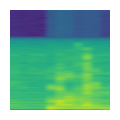

In [4]:
for file in train_files:
    save_specgram(file=file, set_path='train')

In [22]:
for file in test_files:
    save_specgram(file=file, set_path='test')

for file in validation_files:
    save_specgram(file=file, set_path='val')

/Users/harshinderchadha/oratio/env/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


In [4]:
train_images = get_directory_content(path='../data/images/train/')
test_images = get_directory_content(path='../data/images/test/')
val_images = get_directory_content(path='../data/images/val/')

In [5]:
import pickle

In [6]:
def prep_data_set(image_lst, filepath, filename):
    dataset = []
    labels = []
    for image in image_lst:
        try:
            temp = load_img(filepath+image)
            arr = img_to_array(temp)
            dataset.append(arr)

            labels.append(image.split('-')[0])

            del temp
            del arr
        except:
            pass
    
    dataset = np.array(dataset)
    np.save('../data/processed/'+filename+'.npy', dataset)

    fname = '../data/processed/'+filename+'_labels'
    with open(fname, "wb") as fp:
        pickle.dump(labels, fp)
            

In [7]:
prep_data_set(image_lst=train_images[:12000], filepath='../data/images/train/', filename='train')

: 

: 

In [8]:
prep_data_set(image_lst=test_images, filepath='../data/images/test/', filename='test')
prep_data_set(image_lst=val_images, filepath='../data/images/val/', filename='val')